In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

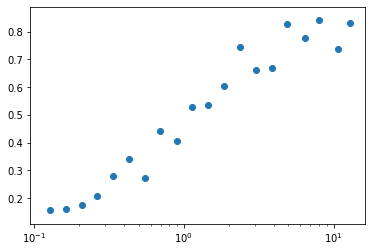

In [41]:
s = 2
a_list = np.logspace(1, 3, 20).astype(np.int32)
n_public_information_patterns = 128

xs, ys = [], []

for a in a_list:
    excess_demands = np.loadtxt(f'../src/simulation/result_a{a}s{s}.txt')
    sigma = np.sqrt(np.mean(excess_demands**2))

    xs.append(n_public_information_patterns / a)
    ys.append(sigma**2 / a)

plt.scatter(xs, ys)

plt.xscale('log')